In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Cargo el dataset y lo analizo un par
# sibsp: numero de hermanos / conyuges a bordo
# parch: numero de padres / hijos a bordo
# embarked: puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)
test_data = pd.read_csv('data/test.csv')
train_data = pd.read_csv('data/train.csv')

print(train_data.shape)
print("-"*40)
print(train_data.shape)

print(train_data.info())
print("-"*40)
print(test_data.info())


(891, 12)
----------------------------------------
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count

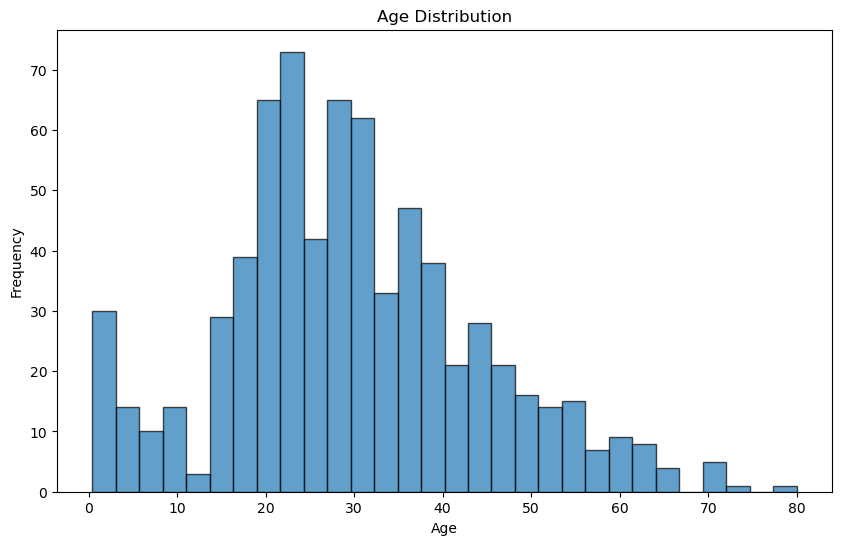

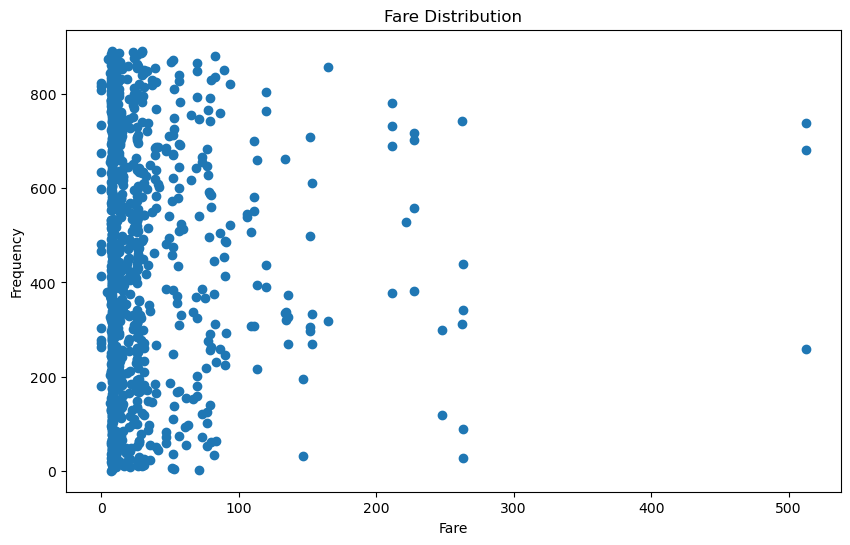

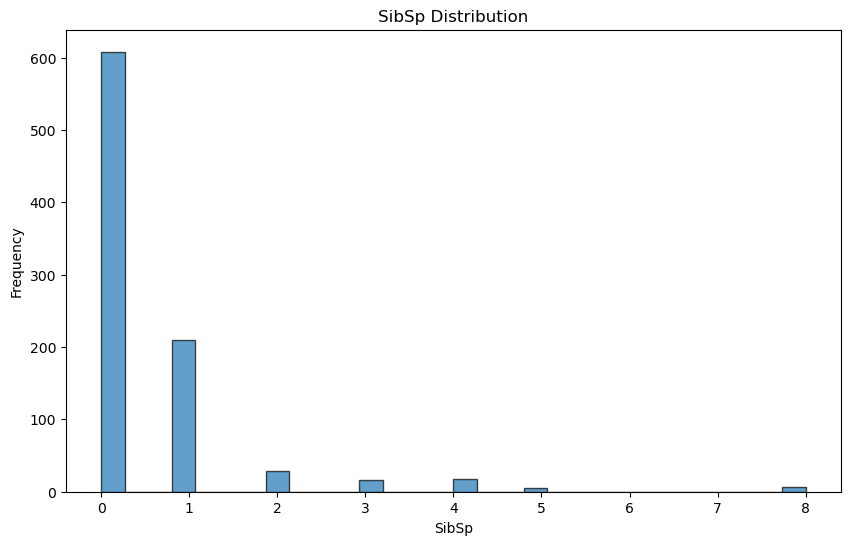

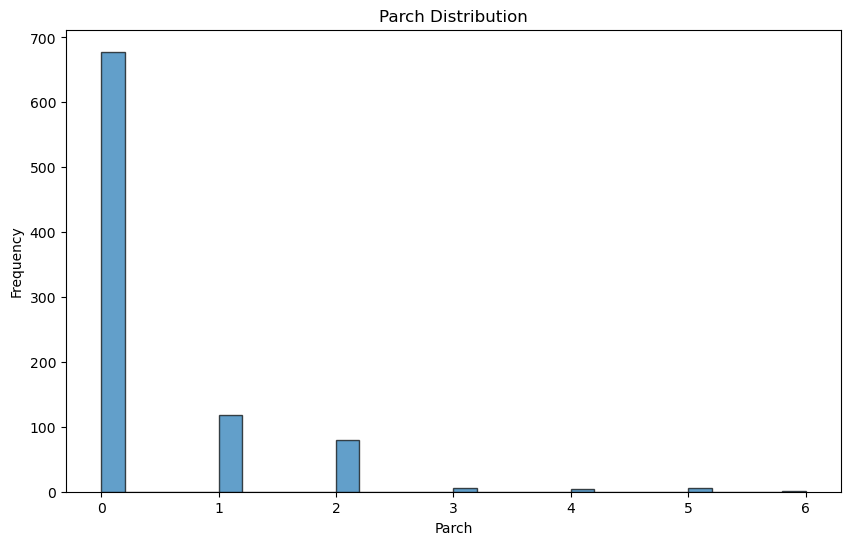

Text(0, 0.5, 'Frequency')

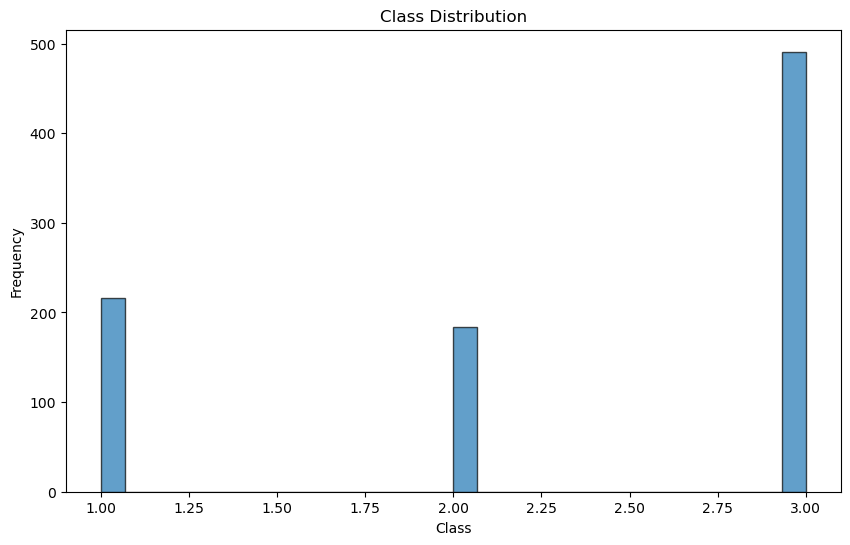

In [7]:
#Grafico los histogramas de las variables numericas

plt.figure(figsize=(10, 6))
plt.hist(train_data['Age'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(train_data['Fare'], train_data['PassengerId'], alpha=0.7, edgecolor='k')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(train_data['SibSp'], bins=30, edgecolor='k', alpha=0.7)
plt.title('SibSp Distribution')
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(train_data['Parch'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Parch Distribution')
plt.xlabel('Parch')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(train_data['Pclass'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')


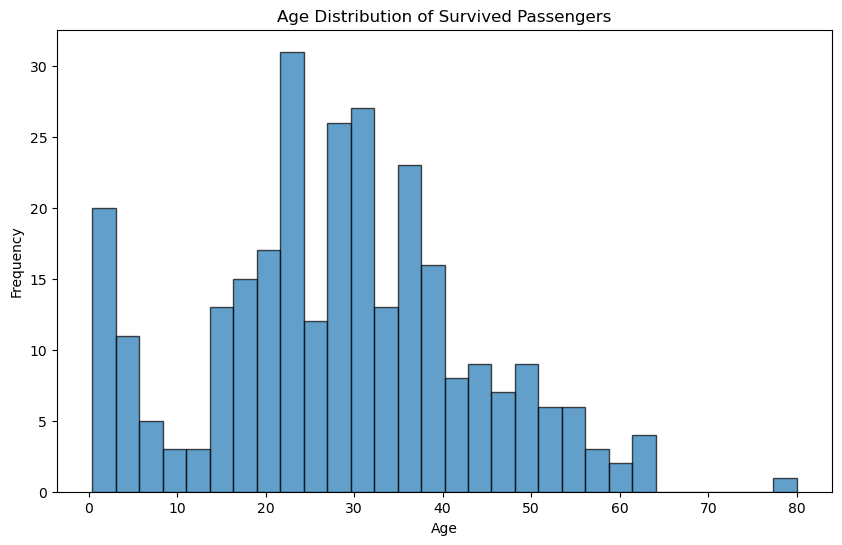

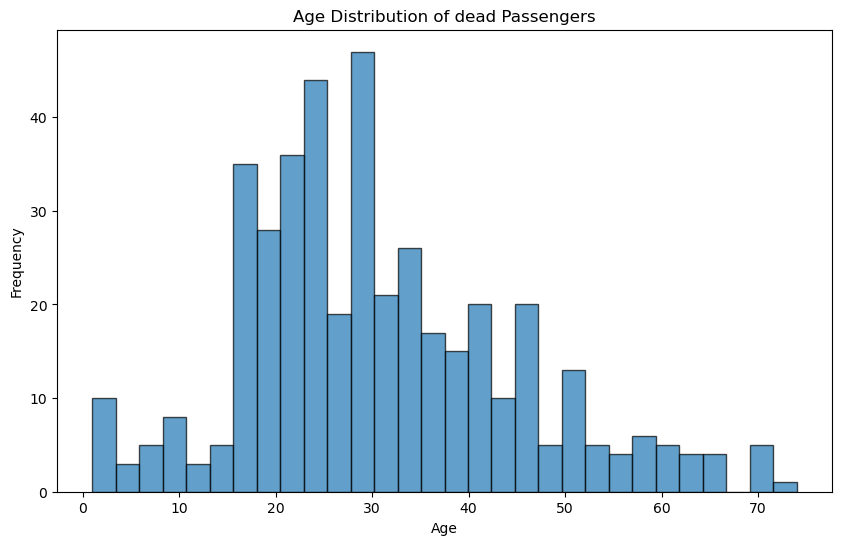

In [6]:

# Grafico Sobrevivientes/Muertos dependiendo de la edad
plt.figure(figsize=(10, 6))
plt.hist(train_data[train_data['Survived'] == 1]['Age'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Age Distribution of Survived Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(train_data[train_data['Survived'] == 0]['Age'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Age Distribution of dead Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



Text(0, 0.5, 'Frequency')

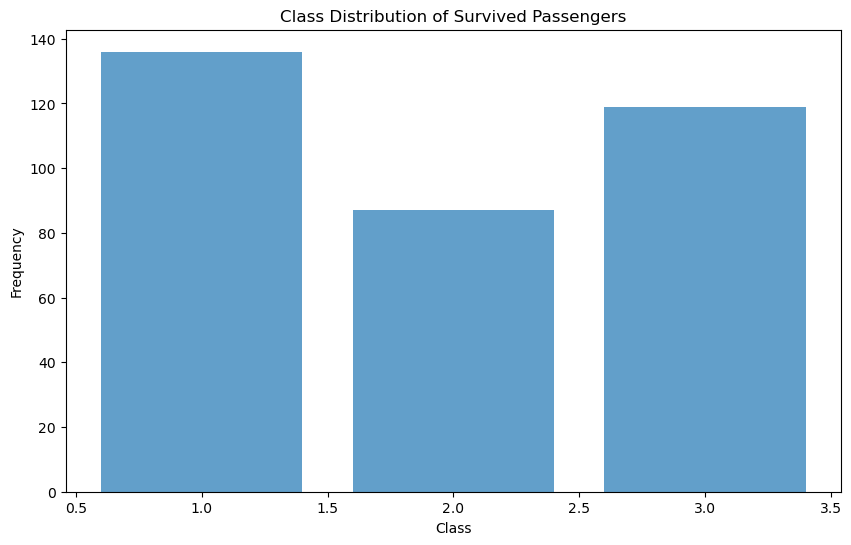

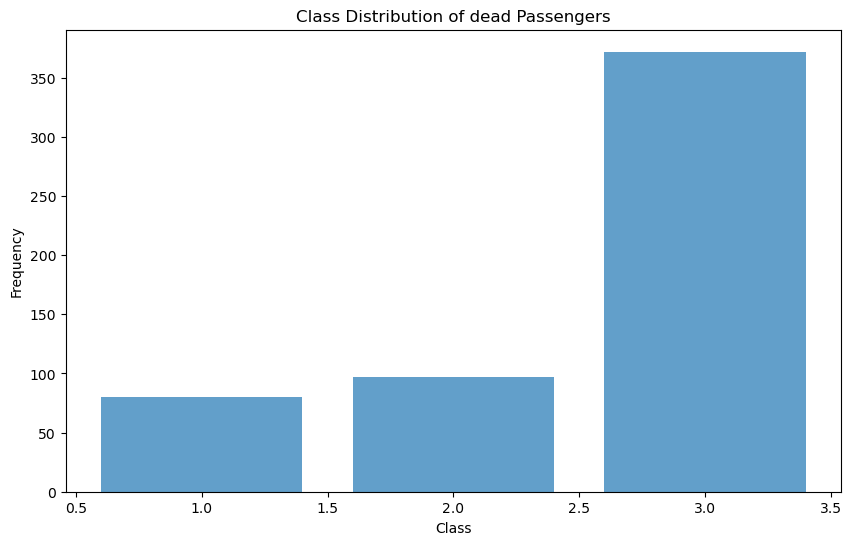

In [17]:
# Grafico Sobrevivientes/Muertos dependiendo de la clase
plt.figure(figsize=(10, 6))
plt.bar(train_data[train_data['Survived'] == 1]['Pclass'].value_counts().index, train_data[train_data['Survived'] == 1]['Pclass'].value_counts().values, alpha=0.7)
plt.title('Class Distribution of Survived Passengers')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.figure(figsize=(10, 6))
plt.bar(train_data[train_data['Survived'] == 0]['Pclass'].value_counts().index, train_data[train_data['Survived'] == 0]['Pclass'].value_counts().values, alpha=0.7)
plt.title('Class Distribution of dead Passengers')
plt.xlabel('Class')
plt.ylabel('Frequency')


In [3]:
# Eliminamos la columna de nombre y ticket
train_data.drop(['Name','Ticket'], axis=1, inplace=True)
test_data.drop(['Name','Ticket'], axis=1, inplace=True)

# Transformamos las variables categoricas a int64
label_enc = LabelEncoder()
for column in ['Sex', 'Embarked', 'Cabin']:
    train_data[column] = label_enc.fit_transform(train_data[column])
    train_data[column] = train_data[column].astype('int64')
    test_data[column] = label_enc.fit_transform(test_data[column])
    test_data[column] = test_data[column].astype('int64')
    

# Agrego el valor medio de la edad en los casos donde no se encuentra definido
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mode()[0])
train_data['Age'] = train_data['Age'].astype('int64')
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mode()[0])
test_data['Age'] = test_data['Age'].astype('int64')

#train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].mode()[0])
#train_data['Fare'] = train_data['Fare'].astype('float32')
#test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mode()[0])
#test_data['Fare'] = test_data['Fare'].astype('float32')

# Lleno los posibles valores nulos con 0
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

#Creo una nueva columna en base a la edad y el dinero gastado
train_data['Age_Fare'] = train_data['Age'] * train_data['Fare']
test_data['Age_Fare'] = test_data['Age'] * test_data['Fare']

#Creo una nueva columna en base a la cantidad de familiares a bordo mayores de 50 años y menores de 10
train_data['Family'] = train_data['SibSp'] + train_data['Parch'] + train_data['Age'].apply(lambda x: 1 if x > 50 else 0) + train_data['Age'].apply(lambda x: 1 if x < 10 else 0)
test_data['Family'] = test_data['SibSp'] + test_data['Parch'] + test_data['Age'].apply(lambda x: 1 if x > 50 else 0) + test_data['Age'].apply(lambda x: 1 if x < 10 else 0)

survived_column = train_data['Survived'].copy()
train_data.drop(['Survived'], axis=1, inplace=True)

In [4]:
print(train_data.isnull().sum())
print(train_data.dtypes)
print(train_data.shape)
print("-"*40)
print(test_data.isnull().sum())
print(test_data.dtypes)
print(test_data.shape)


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Age_Fare       0
Family         0
dtype: int64
PassengerId      int64
Pclass           int64
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Fare           float64
Cabin            int64
Embarked         int64
Age_Fare       float64
Family           int64
dtype: object
(891, 11)
----------------------------------------
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Age_Fare       0
Family         0
dtype: int64
PassengerId      int64
Pclass           int64
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Fare           float64
Cabin            int64
Embarked         int64
Age_Fare       float64
Family           int64
dtype: object
(418, 11)


In [5]:
#Creamos una red neuronal para predecir si sobrevive o no

model = keras.Sequential([
    keras.layers.Input(shape=(train_data.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall'])

model.fit(train_data, survived_column, epochs=100)


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.6456 - loss: 13.3663 - precision: 0.5741 - recall: 0.3014 
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.5986 - loss: 4.3551 - precision: 0.4568 - recall: 0.4304
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.5913 - loss: 1.8325 - precision: 0.4789 - recall: 0.3672
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.5736 - loss: 1.7510 - precision: 0.4674 - recall: 0.3902
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.6023 - loss: 1.5751 - precision: 0.5006 - recall: 0.3439
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.6109 - loss: 1.7696 - precision: 0.5180 - recall: 0.4223
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.6045 - loss: 1.3215 - precision: 0.5117 - recall: 0.4894
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.6259 - loss: 1.0181 - precision: 0.4909 - recall: 0.3760
Epoch 

In [6]:
# Realizar predicciones con el modelo entrenado
predictions = model.predict(test_data)

# Convertir las probabilidades en 0 o 1
predictions = np.round(predictions).astype(int)

test_data['Survived'] = predictions

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [7]:
# Comparar las predicciones con el dataframe survived_passanger con el dataset test_data
real_test_result = pd.read_csv("data/gender_submission.csv")
test_predictions = test_data[['Survived', 'PassengerId']]
test_predictions = test_predictions.merge(real_test_result, on='PassengerId')
test_predictions['Correct'] = test_predictions['Survived_x'] == test_predictions['Survived_y']
print(test_predictions['Correct'].value_counts())
print("-"*40)
print(test_predictions['Correct'].value_counts(normalize=True))



Correct
True     294
False    124
Name: count, dtype: int64
----------------------------------------
Correct
True     0.703349
False    0.296651
Name: proportion, dtype: float64
